In [1]:
# Loading imp Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)# To see all the columns of a dataframe
pd.set_option('display.max_rows', None)

In [2]:
#Reading the file
df_bureau=pd.read_csv('bureau.csv')

In [3]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
# Finding the fraction of Missing values in the training set.
df_missing=df_bureau.isna().sum()
df_miss_percent=df_bureau.isna().sum()/len(df_bureau)
df_app_miss=pd.DataFrame({'Missing Values':df_missing,'Fraction of Missing Values':df_miss_percent})
print(df_app_miss.sort_values(by=['Missing Values'],ascending=False).head(30))

                        Missing Values  Fraction of Missing Values
AMT_ANNUITY                    1226791                    0.714735
AMT_CREDIT_MAX_OVERDUE         1124488                    0.655133
DAYS_ENDDATE_FACT               633653                    0.369170
AMT_CREDIT_SUM_LIMIT            591780                    0.344774
AMT_CREDIT_SUM_DEBT             257669                    0.150119
DAYS_CREDIT_ENDDATE             105553                    0.061496
AMT_CREDIT_SUM                      13                    0.000008
CREDIT_ACTIVE                        0                    0.000000
CREDIT_CURRENCY                      0                    0.000000
DAYS_CREDIT                          0                    0.000000
CREDIT_DAY_OVERDUE                   0                    0.000000
SK_ID_BUREAU                         0                    0.000000
CNT_CREDIT_PROLONG                   0                    0.000000
AMT_CREDIT_SUM_OVERDUE               0                    0.00

In [5]:
# importing Missingno package to analyze missing values
import missingno as msno

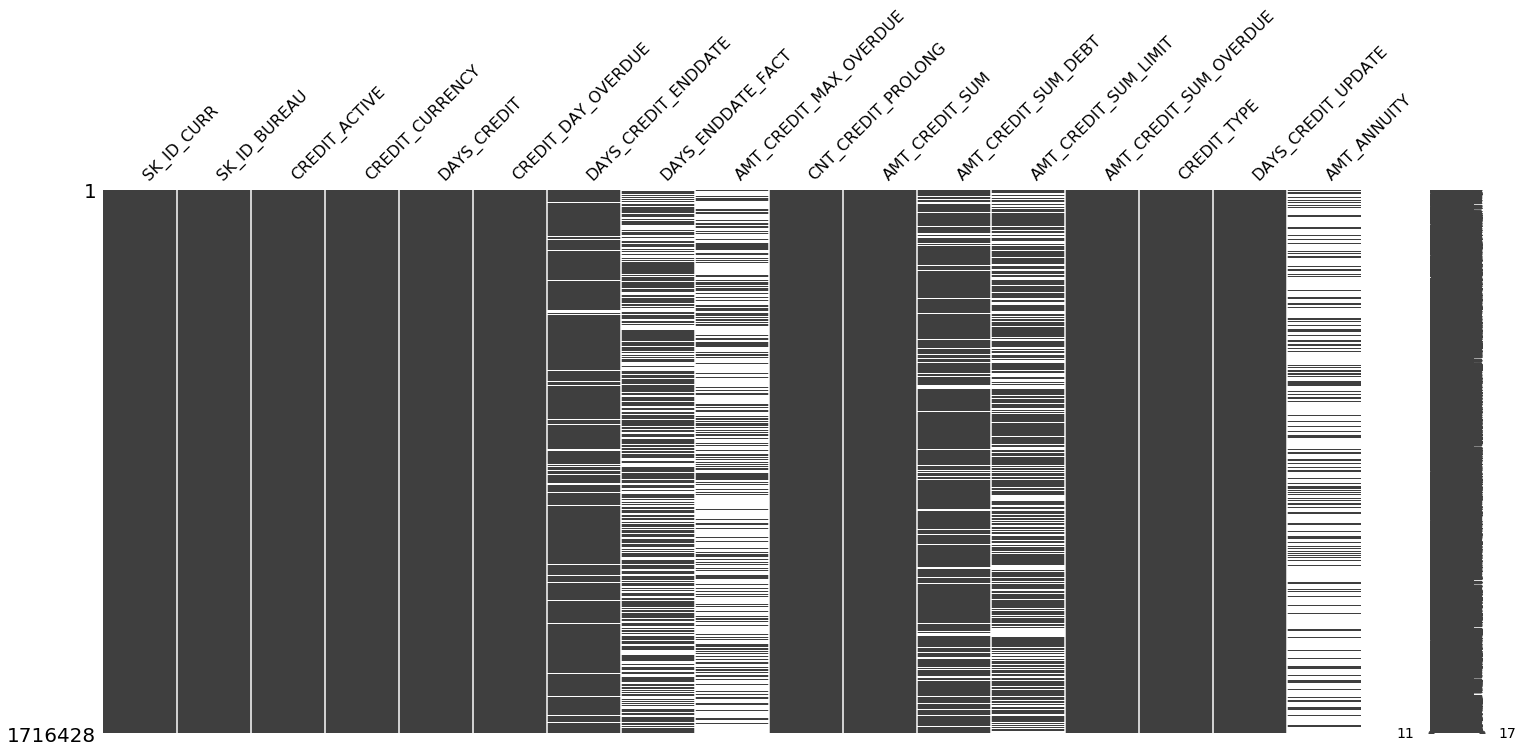

In [6]:
msno.matrix(df_bureau)

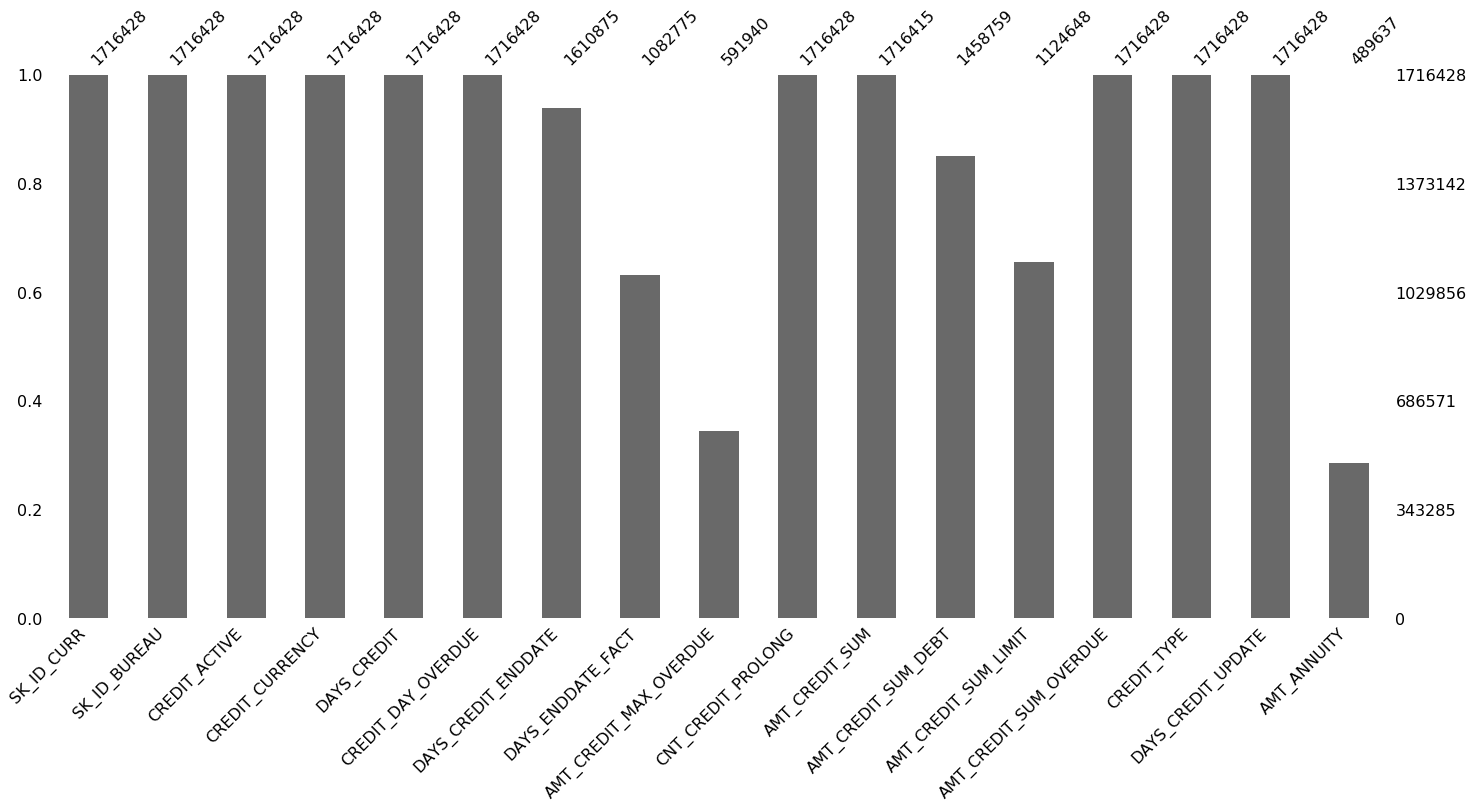

In [7]:
msno.bar(df_bureau)

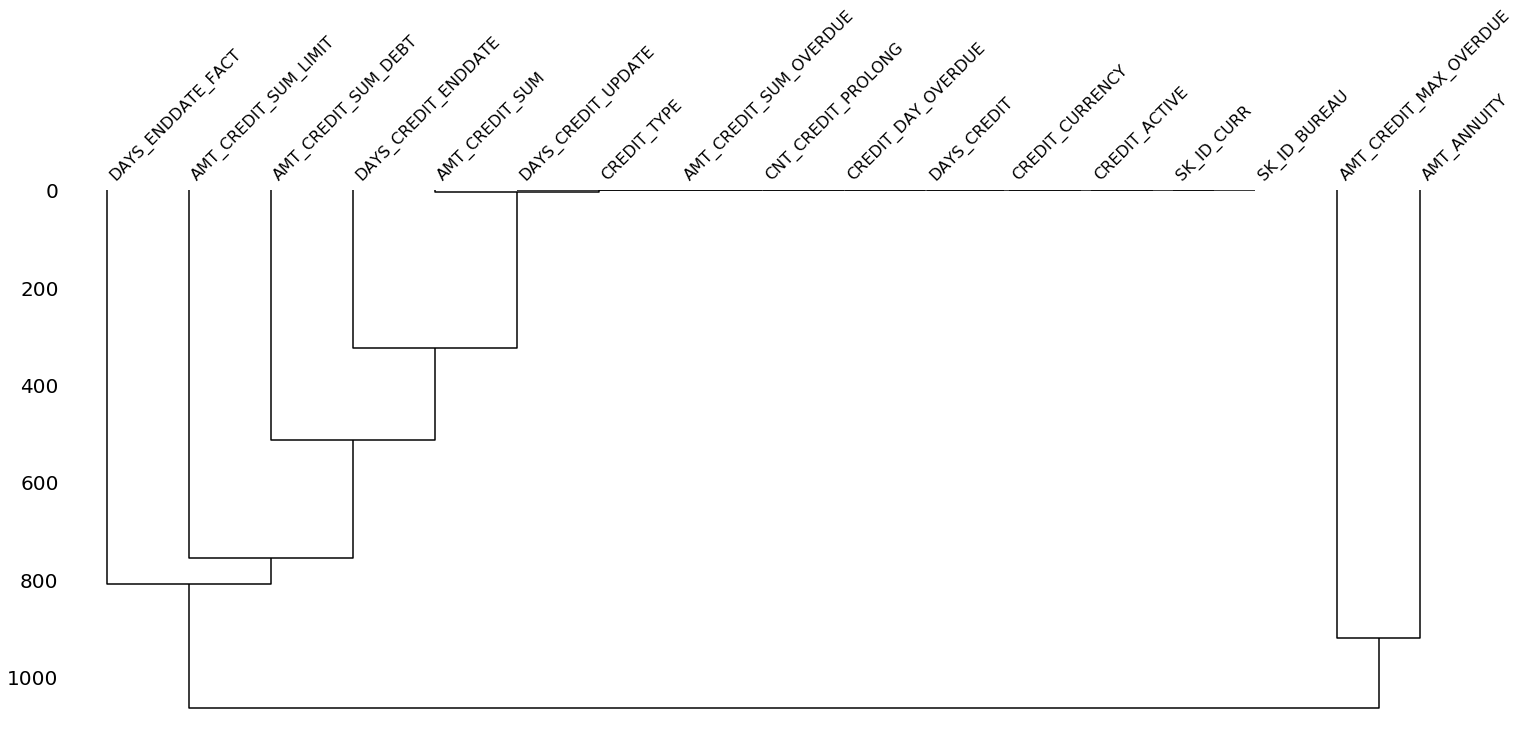

In [9]:
msno.dendrogram(df_bureau)

### From the above missingo graphs , we can clearly see that the Missing Data fall under the category of Missing not at Random (MNAR)

In [8]:
# Filtering out the dataset columns that had less than 30% missing values.
desired_cols=df_miss_percent.loc[df_miss_percent < .3].index

In [9]:
df_bureau_r=df_bureau[desired_cols]
print(df_bureau_r.head())

   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  CNT_CREDIT_PROLONG  \
0                   0               -153.0                   0   
1                   0               1075.0                   0   
2                   0                528.0                   0   
3                   0                  NaN                   0   
4                   0               1197.0                   0   

   AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_OVERDUE  \
0         91323.0                  0.0                     0.0   
1        225000.0         

In [10]:
df_bureau_new=df_bureau_r.isna().sum()/len(df_bureau_r)
print(df_bureau_new)

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
dtype: float64


In [21]:
# Saving the new bureau dataframe (that had less than 30% missing values in each column)
df_bureau_r.to_csv('New_bureau.csv',index=False)

In [12]:
df_bureau_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 13 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
dtypes: float64(4), int64(6), object(3)
memory usage: 170.2+ MB
